# Problem 4, Parts F-H: Stochastic Gradient Descent with a Larger Dataset

Use this notebook to write your code for problem 4 parts F-H by filling in the sections marked `# TODO` and running all cells.

In [1]:
# Setup.

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Problem 4F: Perform SGD with the new dataset

For the functions below, you may re-use your code from parts 4C-E. Note that you can now modify your SGD function to return the final weight vector instead of the weights after every epoch.

In [2]:
def loss(X, Y, w):
    '''
    Calculate the squared loss function.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w: A (D, ) shaped numpy array containing the weight vector.
    
    Outputs:
        The loss evaluated with respect to X, Y, and w.
    '''
    
    sq_loss = np.sum((Y - np.dot(X, w)) ** 2)
    return sq_loss
    
    pass

def gradient(x, y, w):
    '''
    Calculate the gradient of the loss function with respect to
    a single point (x, y), and using weight vector w.
    
    Inputs:
        x: A (D, ) shaped numpy array containing a single data point.
        y: The float label for the data point.
        w: A (D, ) shaped numpy array containing the weight vector.
        
    Output:
        The gradient of the loss with respect to x, y, and w. 
    '''
    
    sq_gradient = -2 * x * (y - np.dot(w, x))
    return sq_gradient
    
    pass

def SGD(X, Y, w_start, eta, N_epochs):
    '''
    Perform SGD using dataset (X, Y), initial weight vector w_start,
    learning rate eta, and N_epochs epochs.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w_start:  A (D, ) shaped numpy array containing the weight vector initialization.
        eta: The step size.
        N_epochs: The number of epochs (iterations) to run SGD.
        
    Outputs:
        w: A (D, ) shaped array containing the final weight vector.
        losses: A (N_epochs, ) shaped array containing the losses from all iterations.
    '''
    # No longer W vector, final w only
    
    w = w_start
    losses = np.array([])
        
    for i in range(N_epochs):
        index = np.random.permutation(len(Y))
        losses = np.append(losses, loss(X, Y, w))
        for j in index:
            w = w - eta * gradient(X[j], Y[j], w)
    
    return w, losses
    
    pass

Next, we need to load the dataset. In doing so, the following function may be helpful:

In [3]:
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    
    Inputs:
        filename: GeneratorExitiven as a string.
    
    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=1, delimiter=',')

Now, load the dataset in `sgd_data.csv` and run SGD using the given parameters; print out the final weights.

In [5]:
data = load_data("sgd_data.csv")
X_0 = data[:,:-1]
Y = data[:,-1]
X = np.c_[np.ones(X_0.shape[0]), X_0] # add one more column for threshold

eta = np.exp(-15)
b = 0.001
w_start = [b, 0.001, 0.001, 0.001, 0.001]
N_epochs = 800

w, losses = SGD(X, Y, w_start, eta, N_epochs)

print(w)

[ -0.22717707  -5.94209998   3.94391318 -11.72382875   8.78568403]


## Problem 4G: Convergence of SGD

This problem examines the convergence of SGD for different learning rates. Please implement your code in the cell below:

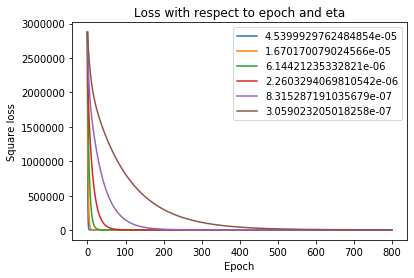

In [7]:
'''Plotting SGD convergence'''

eta_vals = [np.exp(-10), np.exp(-11), np.exp(-12), np.exp(-13), np.exp(-14), np.exp(-15)]
w_start = [0.001, 0.001, 0.001, 0.001, 0.001] 
N_epochs = 800

for eta in eta_vals:
    W, losses = SGD(X, Y, w_start, eta, N_epochs)
    plt.plot(losses, label=str(eta))

plt.title('Loss with respect to epoch and eta')
plt.xlabel('Epoch')
plt.ylabel('Square loss')
plt.legend(loc = "best")
plt.show()

## Problem 4H

Provide your code for computing the least-squares analytical solution below.

In [8]:
pinv_X = np.linalg.pinv(X) # compute pseudo-inverse of X
w = np.dot(pinv_X,Y) # w = pseudo-inverse * Y
print(w)

[ -0.31644251  -5.99157048   4.01509955 -11.93325972   8.99061096]
